<a href="https://colab.research.google.com/github/MohamedAbuAmira/ML-DL-Examples/blob/master/CNN_model_to_classify_images_of_clothing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import TensorFlow and other libraries

In [95]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


# Import the Fashion MNIST dataset

The Fashion MNIST dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels).
60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images.

<img src="https://tensorflow.org/images/fashion-mnist-sprite.png">

In [96]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

**the dataset returns four NumPy arrays**

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [97]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explore the data

In [98]:
#60,000 images in the training set, with each image represented as 28 x 28 pixels
train_images.shape



(60000, 28, 28)

In [99]:
# 60,000 labels in the training set
train_labels.shape 

(60000,)

In [100]:
#Each label is an integer between 0 and 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [101]:
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


In [102]:
#the first image, label
print(train_images[0])
print("Class name: {} \n Label: {}".format(class_names[train_labels[0]], train_labels[0]))


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [103]:
print("max pixel: ", train_images[0].max())
print("min pixel: ", train_images[0].min())

max pixel:  255
min pixel:  0


# Preprocess the data

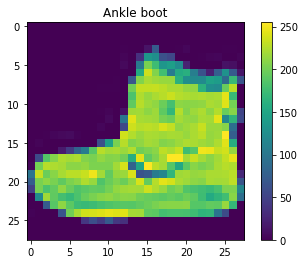

In [104]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.title(class_names[train_labels[0]])
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255.

In [105]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [106]:
print("max pixel: ", train_images[0].max())
print("min pixel: ", train_images[0].min())

max pixel:  1.0
min pixel:  0.0


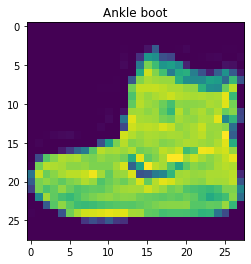

In [107]:
plt.figure()
plt.imshow(train_images[0])
plt.title(class_names[train_labels[0]])
plt.grid(False)
plt.show()

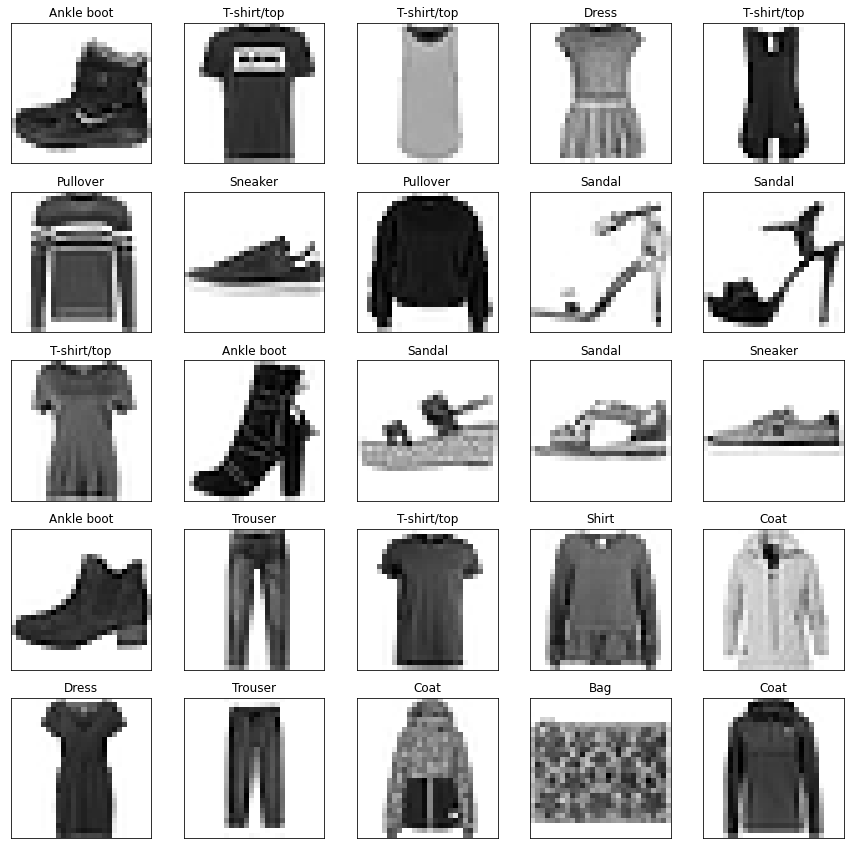

In [108]:
# display the first 25 images from the training set

plt.figure(figsize=(15, 15))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[i]])

plt.show()
  


# Build the model

## Set up the layers

In [109]:
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28, 28)), #two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels)
                        keras.layers.Dense(64, activation='relu'),  ##64 nodes (or neurons)
                        

                        keras.layers.Dense(128, activation='relu'), #128 nodes (or neurons)
                        

                        keras.layers.Dense(256, activation='relu'), ##256 nodes (or neurons)
                        keras.layers.Dropout(0.20),

                        keras.layers.Dense(len(class_names)),

##the last layer returns a logits array with length of 10. 
#Each node contains a score that indicates the current image belongs to one of the 10 classes

])

## Compile the model

the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [110]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.

In [111]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_14 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2570      
Total params: 94,154
Trainable params: 94,154
Non-trainable params: 0
__________________________________________________

## Feed the model

In [112]:
model.fit(train_images, train_labels, epochs=30)


Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5077 - accuracy: 0.8170
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3755 - accuracy: 0.8622
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3408 - accuracy: 0.8734
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3180 - accuracy: 0.8824
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3019 - accuracy: 0.8880
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2859 - accuracy: 0.8912
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2746 - accuracy: 0.8962
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2645 - accuracy: 0.8999
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2584 - accuracy: 0.9023
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.248

## Evaluate accuracy

In [113]:
# compare how the model performs on the test dataset

test_loss, test_accuracy= model.evaluate(test_images, test_labels, verbose=3)

print('\nTest losses:', test_loss)
print('\nTest accuracy:', test_accuracy)



Test losses: 0.47584155201911926

Test accuracy: 0.8797000050544739


## Make predictions

In [114]:
# The model's linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, 

probability_model = keras.Sequential([
                                      model,
                                      keras.layers.Softmax()])

In [115]:
predictions= probability_model.predict(test_images)

**the model has predicted the label for each image in the testing set.**

In [116]:
#look at the first prediction
predictions[0]

array([1.0554548e-11, 4.3646762e-12, 3.0300355e-13, 5.9638627e-11,
       1.8223661e-14, 7.7971245e-06, 2.3213950e-11, 7.3075527e-04,
       3.0697916e-12, 9.9926144e-01], dtype=float32)

**A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing.**

In [117]:
#The highest prob
predictions[0].max()

0.99926144

In [118]:
# which label has the highest confidence value
pred_label= np.argmax(predictions[0])
pred_label

9

In [119]:
# which class name
class_names[pred_label]

'Ankle boot'

In [120]:
# make sure is correct

# examining the test label shows that this classification is correct

test_labels[0]

9

make some function to display predictions

In [121]:
def plot_image(i, predictions_array, true_labels, images):
  true_label, image=train_labels[i], images[i]

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(image, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color="blue"
  else:
    color="red"

  plt.xlabel("{} {:2.0f}% (true: {})".format(class_names[predicted_label], 100*np.max(predictions_array),
                                       class_names[true_label]), color=color)


In [122]:
def plot_value_array(i, predictions_array, true_labels):
  true_label = true_labels[i]

  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])

  predicted_label = np.argmax(predictions_array)
    

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Verify predictions

the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red

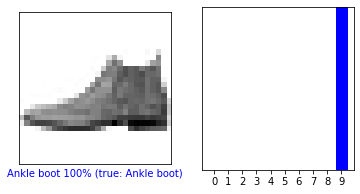

In [123]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

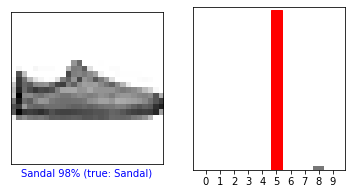

In [124]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

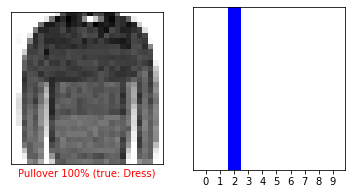

In [125]:
i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

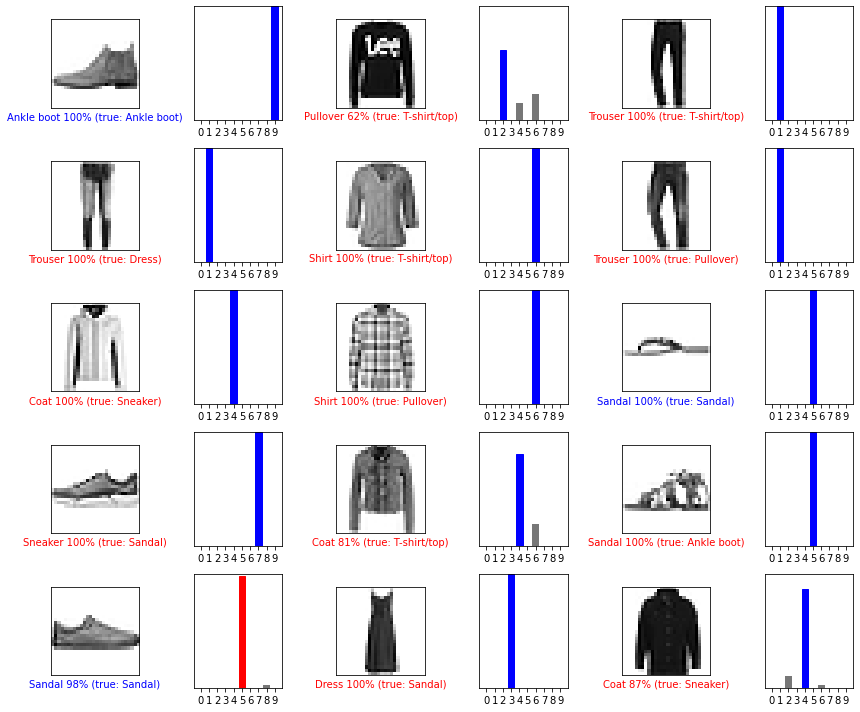

In [126]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Use the trained model

In [151]:
#use the trained model to make a prediction about a single image.

# Grab an image from the test dataset.
img = test_images[200]

print(img.shape)

(28, 28)


In [152]:
# tf.keras models are optimized to make predictions on a batch, or collection, of examples at once


# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [153]:
# Now predict the correct label for this image:

predictions_single = probability_model.predict(img)

print(predictions_single)

[[4.2929023e-37 1.0000000e+00 1.7821284e-38 8.7202705e-21 3.7389559e-29
  0.0000000e+00 5.4820745e-25 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


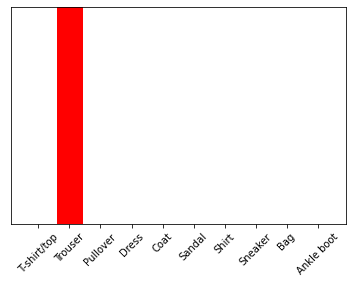

In [154]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

keras.Model.predict returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [155]:
pred_label=np.argmax(predictions_single[0])
pred_label


1

In [156]:
print("True: ", class_names[pred_label])
print("Predict: ", class_names[test_labels[200]])

True:  Trouser
Predict:  Trouser


**so is correct prediction**

This all writes by my hands but the line of codes from https://www.tensorflow.org/tutorials/keras/classification